<a href="https://colab.research.google.com/github/PhamAnhKiet20146220/AI-T7-tiet_1234/blob/main/fuzzydo_am_khong_khi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d6e3817d4050df1cbecce22c02324ee77c3ff090a431a6eb5db32d92351a760a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


190.97222222222223


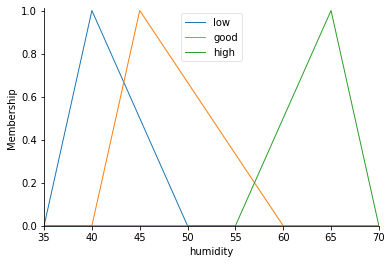

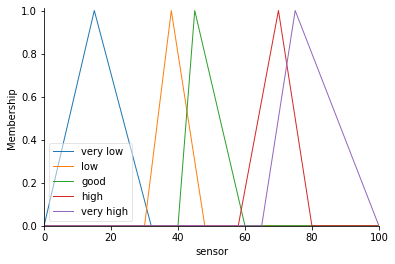

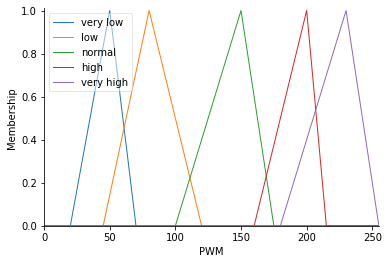

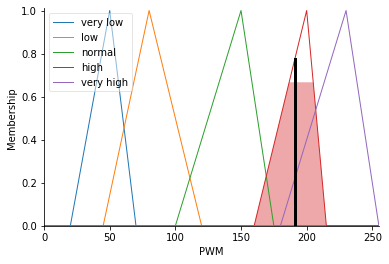

In [7]:
#điều khiển độ ẩm
import numpy as np
import skfuzzy as fuzz
from  skfuzzy import control as ctrl

humidity = ctrl.Antecedent(np.arange(35,71,1),'humidity')
sensor = ctrl.Antecedent(np.arange(0,101,1),'sensor')
PWM = ctrl.Consequent(np.arange(0,256,5),'PWM')

humidity['low']=fuzz.trimf(humidity.universe,[35,40,50])
humidity['good']=fuzz.trimf(humidity.universe,[40,45,60])
humidity['high']=fuzz.trimf(humidity.universe,[55,65,70])

sensor['very low']=fuzz.trimf(sensor.universe,[0,15,32])
sensor['low']=fuzz.trimf(sensor.universe,[30,38,48])
sensor['good']=fuzz.trimf(sensor.universe,[40,45,60])
sensor['high']=fuzz.trimf(sensor.universe,[58,70,80])
sensor['very high']=fuzz.trimf(sensor.universe,[65,75,100])

PWM['very low']=fuzz.trimf(PWM.universe,[20,50,70])
PWM['low']=fuzz.trimf(PWM.universe,[45,80,120])
PWM['normal']=fuzz.trimf(PWM.universe,[100,150,175])
PWM['high']=fuzz.trimf(PWM.universe,[160,200,215])
PWM['very high']=fuzz.trimf(PWM.universe,[180,230,255])

humidity.view()
sensor.view()
PWM.view()

rule1=ctrl.Rule(humidity['low'] & sensor['very low'], PWM['very low'])
rule2=ctrl.Rule(humidity['low'] & sensor['low'], PWM['low'])
rule3=ctrl.Rule(humidity['low'] & sensor['good'], PWM['high'])
rule4=ctrl.Rule(humidity['low'] & sensor['high'], PWM['high'])
rule5=ctrl.Rule(humidity['low'] & sensor['very high'], PWM['very high'])

rule6=ctrl.Rule(humidity['good'] & sensor['very low'], PWM['high'])
rule7=ctrl.Rule(humidity['good'] & sensor['low'], PWM['high'])
rule8=ctrl.Rule(humidity['good'] & sensor['good'], PWM['normal'])
rule9=ctrl.Rule(humidity['good'] & sensor['high'], PWM['high'])
rule10=ctrl.Rule(humidity['good'] & sensor['very high'], PWM['very high'])

rule11=ctrl.Rule(humidity['high'] & sensor['very low'], PWM['very high'])
rule12=ctrl.Rule(humidity['high'] & sensor['low'], PWM['high'])
rule13=ctrl.Rule(humidity['high'] & sensor['good'], PWM['normal'])
rule14=ctrl.Rule(humidity['high'] & sensor['high'], PWM['normal'])
rule15=ctrl.Rule(humidity['high'] & sensor['very high'], PWM['normal'])

PWM_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwm = ctrl.ControlSystemSimulation(PWM_ctrl)
pwm.input['humidity']=50
pwm.input['sensor'] = 40
pwm.compute()
print(pwm.output['PWM'])
PWM.view(sim=pwm)